<h1>Linear Regression</h1>
<h2>Framework</h2>
Y : is a numeric response variable<br>
X<sup>(1)</sup>,...,X<sup>(p)</sup> : <i>p</i> numeric explanatory variables (also called features)

<b><font color = "blue">If</font></b> we can assume that the relationship between Y and X is linear, like the one represented by the graphic below:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/220px-Linear_regression.svg.png">

<b><font color = "blue">Then: </font></b> we assume that we can represent it by a model:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/704b31aa61dfc93d672f15bf02aa6d168be49643">

Writing this equation in a <b><font color = "orange">matrix notation</font></b> we have:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8119b3ed1259aa8ff15166488548104b50a0f92e">

<i>Source: </i> Wikipedia

Where:<br>
${n}$ is the number of observations on the dataset<br>
${p}$ is the number of explanatory variables<br>
${y}$ is a vector of the response variable. This is a vector of ${n}$ rows.<br>
${X}$ is a matrix of the explanatory variables, where the columns represent the features and the lines represent the observations. We can also imagine it as a matrix of vectors, where each line ${(i)}$ is a vector of the features that explain the ${y_i}$. Considering that in a linear model we have an interception the first column is filled with ones, representing that this value is taken into account with factor 1 to explain the response variable.This is a matrix of ${n}$ rows and <b>{p+1}</b> columns.<br>
${β}$ is a vector of the coefficients of the model, this is what makes the model linear, because this values are fixed for all the observations. This is a vector of ${(p+1)}$ columns.<br>
${\boldsymbol {\varepsilon }}$ is the noise, and represents the values that cannot be captured simply by the linear model. This is a vector of ${n}$ rows<br>

<h2>Linear Model</h2>

In a linear model we try to define the parameters that will infer in the minimum error between the prediction of the model for all datapoints and the actual value presented on the dataset. One of the methods used for this is the least-squared criterion:

So we define an equation that is:

${S(β)=\sum_{i=1}^{n} (y_i-βX_i)^2 = \lVert{Y-βX}\rVert^2}$

${β}$ can assumes many values, but we are interest in the vector that will have the smallest error. So we are interested in ${\hatβ}$ that is the solution that minimizes the error:

${S(\hatβ)=min_{(β\in \mathbf{R}^{(p+1)})}\sum_{i=1}^{n} (y_i-βX_i)^2 = \lVert{Y-βX}\rVert^2}$

The solution for this minimization problem is:

${\hatβ=(^tXX)^{-1}(^tX)Y}$

<h3>Assumptions</h3>
<p><b><font color = "blue">Homoscedasticity: <font></b> by this we consider that the model has a constant variance throughout its domain. This concept is important because the linear regression model gives the same weight to all observations. 

<img src="https://miro.medium.com/max/3326/1*Jan9oVOzNqQyhA4bSg_zwA.png"></p>
<i>Source: </i> Assumptions Of Linear Regression Algorithm by Gomathi tamilselvam

<p><b><font color = "blue">Fixed design: <font></b> The points (or vectors) X1, . . . , Xn are deterministic, in other words they are not random variables. If you are not in a fixed design you need to treat X as a probabilistic model.
    
<p><b><font color = "blue">Independence of the noise: <font></b> It means that the errors of the response variable are uncorrelated with each other. 

<h2>Working on data</h2>

<h3><font color = "blue">Scenario I: Gaussian noise $\mathcal{N}(0,1)$</font></h3>
<hr>
<h4>I.a) Building a Dataset </h4>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
noise = np.random.randn(100, 1)
plt.axvline(x=0, color = "blue")
plt.hist(x=noise, bins='auto', color='orange')
plt.title("Noise distribution")
plt.show()
print("mean: "+str(np.mean(noise)))
print("variance: " +str(np.var(noise)))

<Figure size 640x480 with 1 Axes>

mean: 0.05680490410615346
variance: 1.1712887959115168


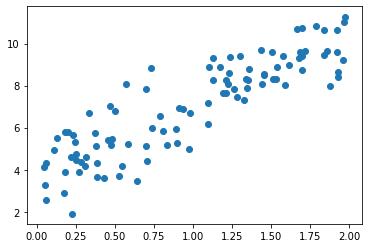

array([[0.0529312 ],
       [0.24871815],
       [0.52918059],
       [1.93118794],
       [1.93143866],
       [0.64452399],
       [0.4563752 ],
       [1.97515033],
       [0.25215884],
       [0.31041494],
       [0.06222228],
       [1.19076994],
       [0.98408709],
       [1.22413204],
       [0.80995128],
       [1.10589764],
       [0.54703075],
       [0.38544247],
       [1.97051155],
       [0.22460431],
       [1.36067403],
       [0.91184231],
       [1.70086974],
       [0.83198866],
       [0.73112418],
       [0.13077067],
       [1.17215822],
       [1.4366504 ],
       [1.21202891],
       [0.37886111],
       [0.31333562],
       [0.93455505],
       [0.79021402],
       [1.58912084],
       [0.24595026],
       [0.47645153],
       [0.04359825],
       [0.10917977],
       [0.69751957],
       [0.43040219],
       [1.45813996],
       [1.441896  ],
       [0.97439826],
       [1.70196555],
       [0.89732048],
       [1.51057783],
       [1.84025457],
       [1.923

In [3]:
y = 4 + 3 * X + noise
plt.scatter(X,y)
plt.show()

<h4>I.b) Modeling </h4>
There are many ways to solve the minimization problem of the least-squared method:

<h5><b><font color = "orange">1) Using the normal equation</font></b></h5>
${\hatβ=(^tXX)^{-1}(^tX)Y}$

In [415]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_matrix = np.c_[np.ones((100, 1)), X]
tXX_inv=np.linalg.inv(np.dot(X_matrix.T,X_matrix))
beta_hat = np.dot(np.dot(tXX_inv,X_matrix.T),y)

X_matrix = np.c_[np.ones((100, 1)), X]
tXX_inv=np.linalg.inv(np.matmul(X_matrix.T,X_matrix))
beta_hat2 = np.matmul(np.matmul(tXX_inv,X_matrix.T),y)

df=pd.DataFrame({'Solution using':['Book sample', 'Equation with dot function', 'Equation with matmul function'], 
                    'Intercept':[theta_best[0], beta_hat[0], beta_hat2[0]], 
                    'Coefficient':[theta_best[1], beta_hat[1], beta_hat2[1]]})
df.style.hide_index()

Solution using,Intercept,Coefficient
Book sample,[4.02298221],[2.87832113]
Equation with dot function,[4.02298221],[2.87832113]
Equation with matmul function,[4.02298221],[2.87832113]


<h5><b><font color = "orange">2. Using Scikit-learn</font></b></h5>
Using the Linear Regression method from Scikit-learn

In [416]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model=lin_reg.fit(X, y)
pd.DataFrame([lin_reg.intercept_, lin_reg.coef_], ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.02298
coefficient,[2.8783211286802923]


<b>Measuring the quality of the model</b>

coefficient of determination: 0.7601769052788754


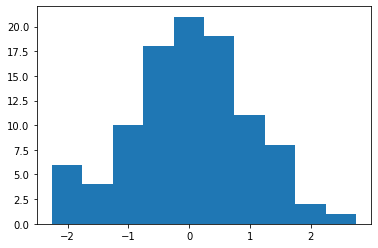

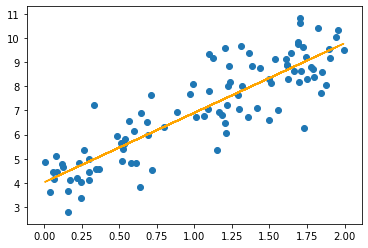

RMSE for simple linear regression:  0.9789910595274831


In [417]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))


<i><font color = "blue">Remark: </font><i/>
The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), so we obtain the same result using directly using:

In [382]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd
pd.DataFrame(theta_best_svd, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,3.932478
coefficient,2.997212


<h5><b><font color = "orange">3. Using the pseudoinverse</font></b></h5>

This function computes $θ = X^+y$, where $X^+$ is the pseudoinverse of X (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [383]:
sol=np.linalg.pinv(X_b).dot(y)
pd.DataFrame(sol, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,3.932478
coefficient,2.997212


The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U Σ VT$ (see
numpy.linalg.svd()). The pseudoinverse is computed as $X+ = VΣ+UT$. To the matrix $Σ+$, the algorithm takes $Σ$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $XTX$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

<h5><b><font color = "orange">4. Using linear algebra</font></b></h5>

We can understand that our problem is of type: $Ax=b$, applying this to our set we would rewrite it as:
$Xβ = y$
So we can look for the linear independent rows of matrix X, in order to reduce our number of rows to compute. The next step would be finding β that is:

$β = X^{-1}y$

In [384]:
q, r =np.linalg.qr(X_matrix) 
# If A = qr such that q is orthonormal (which is always possible via Gram-Schmidt) then x = inv(r) * (q.T) * b
#r - reduced: linearly independent rows
#q - matrix of orthonormal columns
p = np.dot(q.T, y)
sol_la=np.dot(np.linalg.inv(r), p)
pd.DataFrame(sol_la, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,3.932478
coefficient,2.997212


<h4>I.c) Predicting </h4>

In [192]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86643517],
       [10.24410707]])

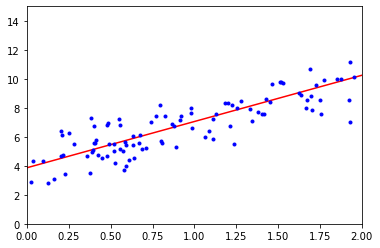

In [289]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [214]:
lin_reg.predict(X_new)

array([[ 3.86643517],
       [10.24410707]])

<hr>

<h3><font color = "blue">Scenario II: Gaussian noise  $\mathcal{N}(\mu=1,\sigma^2=2)$</font></h3>
<hr>

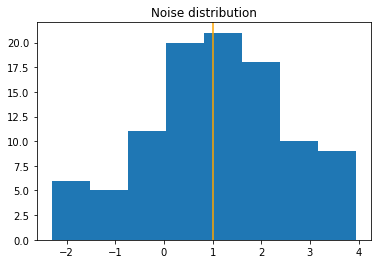

mean: 1.0670322483017234
variance: 2.151593446171533


In [428]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
noise = np.random.normal(loc=1, scale=np.sqrt(2), size=100)
noise=np.reshape(noise,(100,1))
plt.axvline(x=1, color = "orange")
plt.hist(x=noise, bins='auto')
plt.title("Noise distribution")
plt.show()
print("mean: "+str(np.mean(noise)))
print("variance: " +str(np.var(noise)))

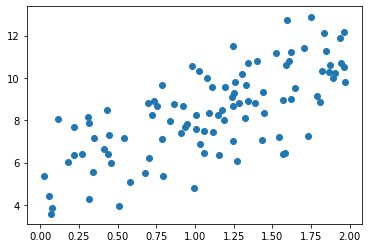

In [429]:
y = 4 + 3 * X + noise

plt.scatter(X, y)
plt.show()

<h5><b><font color = "orange">Solving the minimization problem:</font></b></h5>

In [430]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

pd.DataFrame(theta_best, ['intercept','coefficient'], columns=["Value"])

,Value
intercept,5.384224
coefficient,2.711571


<i>The intercept and the coefficient are worse than the ones we found out, when we had a standard gaussian noise! </i>

<b>Measuring the quality of the model</b>

coefficient of determination: 0.18040865146140303


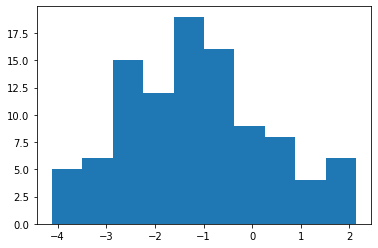

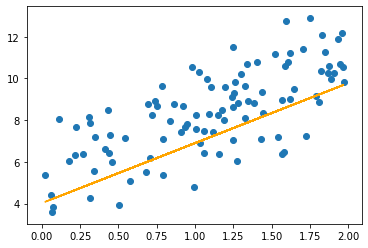

RMSE for simple linear regression:  1.876859416165464


In [431]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))

<b><font color="red">🚩Important:</font></b> In this scenario the assumption of the standard gaussian noise was not respected, so the quality of our estimator for intercept and for the coefficients decreased substantially, showing a great decrease on the coefficient of determination. And the mean squared error increases drastically.

<h4>I.c) Predicting </h4>

In [434]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 5.38422361],
       [10.80736635]])

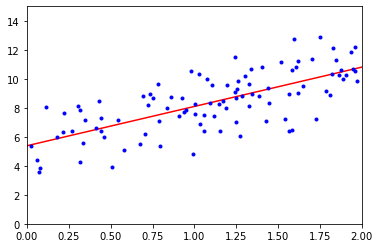

In [435]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [436]:
lin_reg.predict(X_new)

array([[4.02298221],
       [9.77962447]])

🤔 <font color ="blue"> What should we do to improve the results? </font>

<hr>********************************************************************************************************************************************************************<hr>

<h3><font color = "red">Scenario IV: Noise is dependent</font></h3>
<hr>

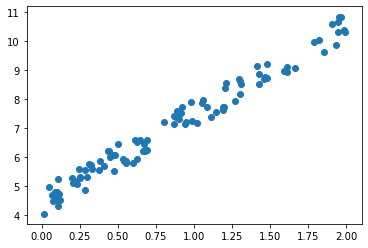

In [455]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
noise = np.arange(100)/100
noise=np.reshape(noise,(100,1))
y = 4 + 3 * X + noise
plt.scatter(X,y)
plt.show()

<h5><b><font color = "orange">Solving using Scikit-learn</font></b></h5>
Using the Linear Regression method from Scikit-learn

In [460]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model=lin_reg.fit(X, y)
pd.DataFrame([lin_reg.intercept_, lin_reg.coef_], ['intercept','coefficient'], columns=["Value"])

,Value
intercept,4.49703
coefficient,[2.997619223917701]


<b>Measuring the quality of the model</b>

coefficient of determination: 0.9735526378090349


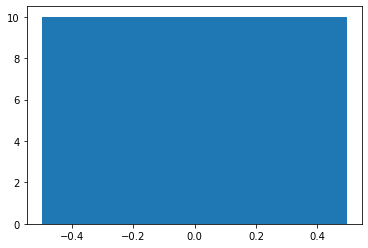

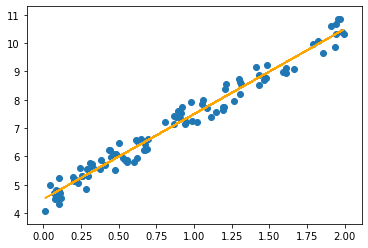

RMSE for simple linear regression:  0.28865734919232966


In [463]:
y_pred = model.predict(X)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)
error= y_pred-y
plt.hist(error,bins=10)
plt.show()
plt.plot(X,y_pred,color="orange")
plt.scatter(X,y)
plt.show()

from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y, y_pred)
print("RMSE for simple linear regression: ",str(np.sqrt(lin_mse)))